<a href="https://colab.research.google.com/github/kalravm41/project117/blob/main/project117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No
Yes


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

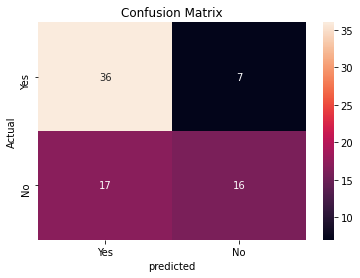

In [1]:
import pandas as pd
import plotly.express as px
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as lr
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

df = pd.read_csv('data.csv')

age = df['age']
target = df['target']

ageTrain,ageTest,targetTrain,targetTest = train_test_split(age, target, test_size= 0.25, random_state= 0)

X= np.reshape(ageTrain.ravel(),(len(ageTrain),1))
Y= np.reshape(targetTrain.ravel(),(len(targetTrain),1))

classifier = lr(random_state= 0)
classifier.fit(X,Y)

x_test= np.reshape(ageTest.ravel(),(len(ageTest),1))
y_test= np.reshape(targetTest.ravel(),(len(targetTest),1))

heartAttackp = classifier.predict(x_test)

predictedValues = []

for i in heartAttackp:
  if i == 0:
    predictedValues.append('No')
  else:
    predictedValues.append('Yes')  

print(predictedValues[1])

ActualValues = []

for i in y_test:
  if i == 0:
    ActualValues.append('No')
  else:
    ActualValues.append('Yes')  
print(ActualValues[1]) 

labels = ['Yes', 'No']

cm = confusion_matrix(ActualValues, predictedValues, labels)

ax = plt.subplot()

sb.heatmap(cm, annot = True, ax= ax)

ax.set_xlabel('predicted')
ax.set_ylabel('Actual')

ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)